# Table of Contents
 <p>

In [1]:
#Pkg.update();
using PyPlot;

In [45]:
Nx=50;

In [46]:
Nw=Nx^2;
Npara=Nx^2;
N=Npara*3;

unit=transpose([cos(pi/6),sin(pi/6)])
a=transpose([2*cos(π/6),0]);
b=[cos(π/6),1+sin(π/6)];
bM=transpose(repeat(b,outer=[1,Nx]))
rotmat=[[cos(2*π/3) -sin(2*π/3)]
        [sin(2*π/3) cos(2*π/3)]]


Xb=Array{Float64}(N,2);
Xw=Array{Float64}(N,2);

## Creating the positions in the first parallelogram
for i in 1:Nx
    Xb[i,:]=(i-1)*a;
    Xw[i,:]=unit+(i-1)*a;
end

for j in 2:Nx
    Xb[(Nx*(j-1)+1):(Nx*(j-1)+Nx),:]=Xb[1:Nx,:]+(j-1)*bM;
    Xw[(Nx*(j-1)+1):(Nx*(j-1)+Nx),:]=Xw[1:Nx,:]+(j-1)*bM;
end


In [47]:
subt=Xb[Npara,2]+1  
Xb[1:Npara,1]=Xb[1:Npara,1]-(Nx-1)*b[1];
Xw[1:Npara,1]=Xw[1:Npara,1]-(Nx-1)*b[1];
Xb[1:Npara,2]=Xb[1:Npara,2]-subt;
Xw[1:Npara,2]=Xw[1:Npara,2]-subt;

Xb[Npara+(1:Npara),1]=rotmat[1,1]*Xb[1:Npara,1]+rotmat[1,2]*Xb[1:Npara,2];
Xw[Npara+(1:Npara),1]=rotmat[1,1]*Xw[1:Npara,1]+rotmat[1,2]*Xw[1:Npara,2];
Xb[Npara+(1:Npara),2]=rotmat[2,1]*Xb[1:Npara,1]+rotmat[2,2]*Xb[1:Npara,2];
Xw[Npara+(1:Npara),2]=rotmat[2,1]*Xw[1:Npara,1]+rotmat[2,2]*Xw[1:Npara,2];

Xb[2*Npara+(1:Npara),1]=rotmat[1,1]*Xb[Npara+(1:Npara),1]+rotmat[1,2]*Xb[Npara+(1:Npara),2];
Xw[2*Npara+(1:Npara),1]=rotmat[1,1]*Xw[Npara+(1:Npara),1]+rotmat[1,2]*Xw[Npara+(1:Npara),2];
Xb[2*Npara+(1:Npara),2]=rotmat[2,1]*Xb[Npara+(1:Npara),1]+rotmat[2,2]*Xb[Npara+(1:Npara),2];
Xw[2*Npara+(1:Npara),2]=rotmat[2,1]*Xw[Npara+(1:Npara),1]+rotmat[2,2]*Xw[Npara+(1:Npara),2];

In [48]:
vb=sortperm(Xb[:,1]+Npara*Xb[:,2])
vw=sortperm(Xw[:,1]+Npara*Xw[:,2])
Xb=Xb[vb,:];
Xw=Xw[vw,:];

In [49]:
nrowb=[collect(Nx:(2*Nx));collect((2*Nx-1):-1:(Nx+1))]
nroww=flipdim(nrowb,1)

i0b=ones(nrowb)
i0w=ones(nroww)
for i in 2:length(nrowb)
    i0b[i]=i0b[i-1]+nrowb[i-1]
    i0w[i]=i0w[i-1]+nroww[i-1]
end
push!(i0b,N+1);
push!(i0w,N+1);

In [50]:
offsetb=zeros(N+1)
offsetw=zeros(N+1)
for i in 1:Nx
    offsetb[i0b[i]:i0b[i+1]]=i-1
    offsetb[i0b[i+Nx]:i0b[i+1+Nx]]=Nx-i
    offsetw[i0w[i]:i0w[i+1]]=i-1
    offsetw[i0w[i+Nx]:i0w[i+1+Nx]]=Nx-i       
end


In [51]:
for i in 1:N
    #println(i,' ',Bondsw[i,:],' ',Bondsb[i,:])
end

In [52]:
Bondsw=Array{Int64}(N,3);
Bondsb=Array{Int64}(N,3);
for i in 1:N
    Bondsb[i,2]=i+offsetb[i];
    Bondsw[i,2]=i-offsetw[i];
    Bondsb[i,1]=i+1+offsetb[i];
    Bondsw[i,1]=i-1-offsetw[i];
    Bondsb[i,3]=i-Nx;
    Bondsw[i,3]=i+Nx;
end

Now we create the bottom and top edges boundary conditions

In [53]:
i=1
while isapprox(Xb[1,2],Xb[i,2])
    Bondsb[i,3]=N-Nx+i
    Bondsw[N-Nx+i,3]=i
    #println(N-Nx+i,' ',i)
    i+=1
end

In [54]:
Bondsw[i0w[1:Nx],1]=i0b[Nx+1+(1:Nx)]-1;
Bondsb[i0b[Nx+1+(1:Nx)]-1]=i0w[1:Nx];

Bondsw[i0w[1+(1:Nx)]-1,2]=i0b[Nx+(1:Nx)];
Bondsb[i0b[Nx+(1:Nx)],2]=i0w[1+(1:Nx)]-1;

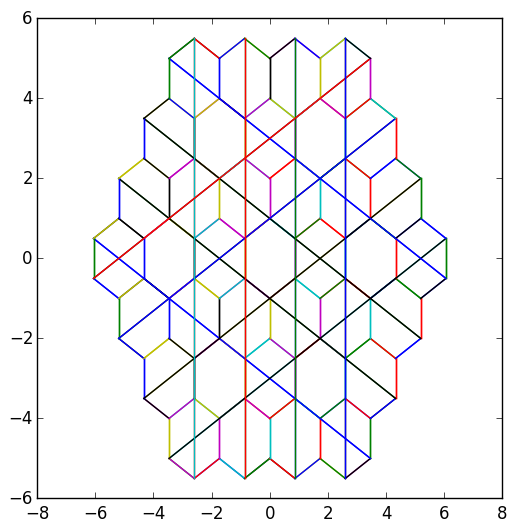

In [39]:
# plot the bonds
if true
    pygui(false)
    w, h = plt[:figaspect](1)
    figure(figsize=(w,h))
    for i in 1:N
        #println(Xb[i,1],' ',Bondsb[i,1])
        xx=[Xb[i,1], Xw[Bondsb[i,1],1] ]
        yx=[Xb[i,2], Xw[Bondsb[i,1],2] ]
        plot(xx,yx)
            
        xx=[Xb[i,1], Xw[Bondsb[i,2],1] ]
        yx=[Xb[i,2], Xw[Bondsb[i,2],2] ]
        plot(xx,yx)
    
        #println(i,' ',Bonds[i,3])
        xx=[Xb[i,1], Xw[Bondsb[i,3],1] ]
        yx=[Xb[i,2], Xw[Bondsb[i,3],2] ]
        plot(xx,yx)
    
        xx=[Xw[i,1], Xb[Bondsw[i,1],1] ]
        yx=[Xw[i,2], Xb[Bondsw[i,1],2] ]
        plot(xx,yx)
        
        xx=[Xw[i,1], Xb[Bondsw[i,2],1] ]
        yx=[Xw[i,2], Xb[Bondsw[i,2],2] ]
        plot(xx,yx)

        #println(i,' ',Bonds[i,3])
        xx=[Xw[i,1], Xb[Bondsw[i,3],1] ]
        yx=[Xw[i,2], Xb[Bondsw[i,3],2] ]
        plot(xx,yx)
    end
end


In [55]:
J=Array{Int8}(N,3);
for i in 1:N
    for j in 1:3
        J[i,j]=1; 
    end
end

uw=ones(Int8,N,3);
ub=ones(Int8,N,3);

A=spzeros(N, N);
M=spzeros(2*N,2*N);

In [56]:
for ii in 1:N
    for jj in 1:3
        A[ii,Bondsw[ii,jj]]=J[ii,jj]*uw[ii,jj];
    end
end

In [57]:
M[(N+1):(2*N),1:N]=A;
M[1:N,(N+1):(2*N)]=A;

In [ ]:
@time (E,V)=eig(full(M));

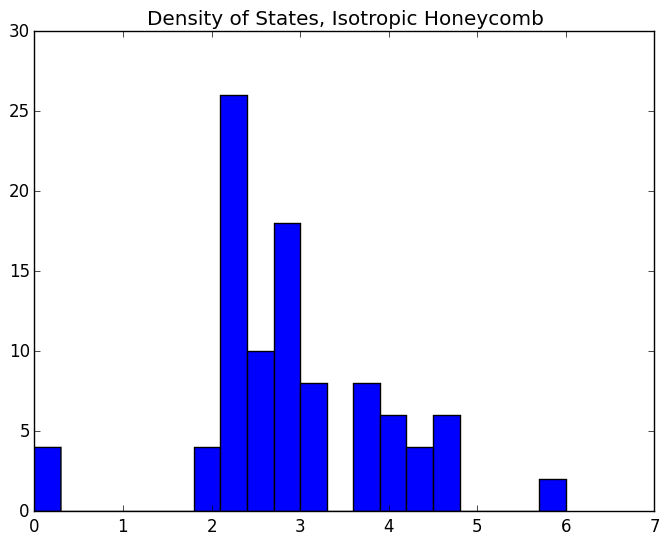

In [44]:
title("Density of States, Isotropic Honeycomb")
plt[:hist](2*abs(E),20);